# 1. Подготовка данных

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib as plt
import numpy as np

In [2]:
train = pd.read_csv ("/datasets/gold_recovery_train.csv")
test = pd.read_csv ("/datasets/gold_recovery_test.csv")
full = pd.read_csv ("/datasets/gold_recovery_full.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [4]:
train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18f5779cd0>,
      dtype=object)

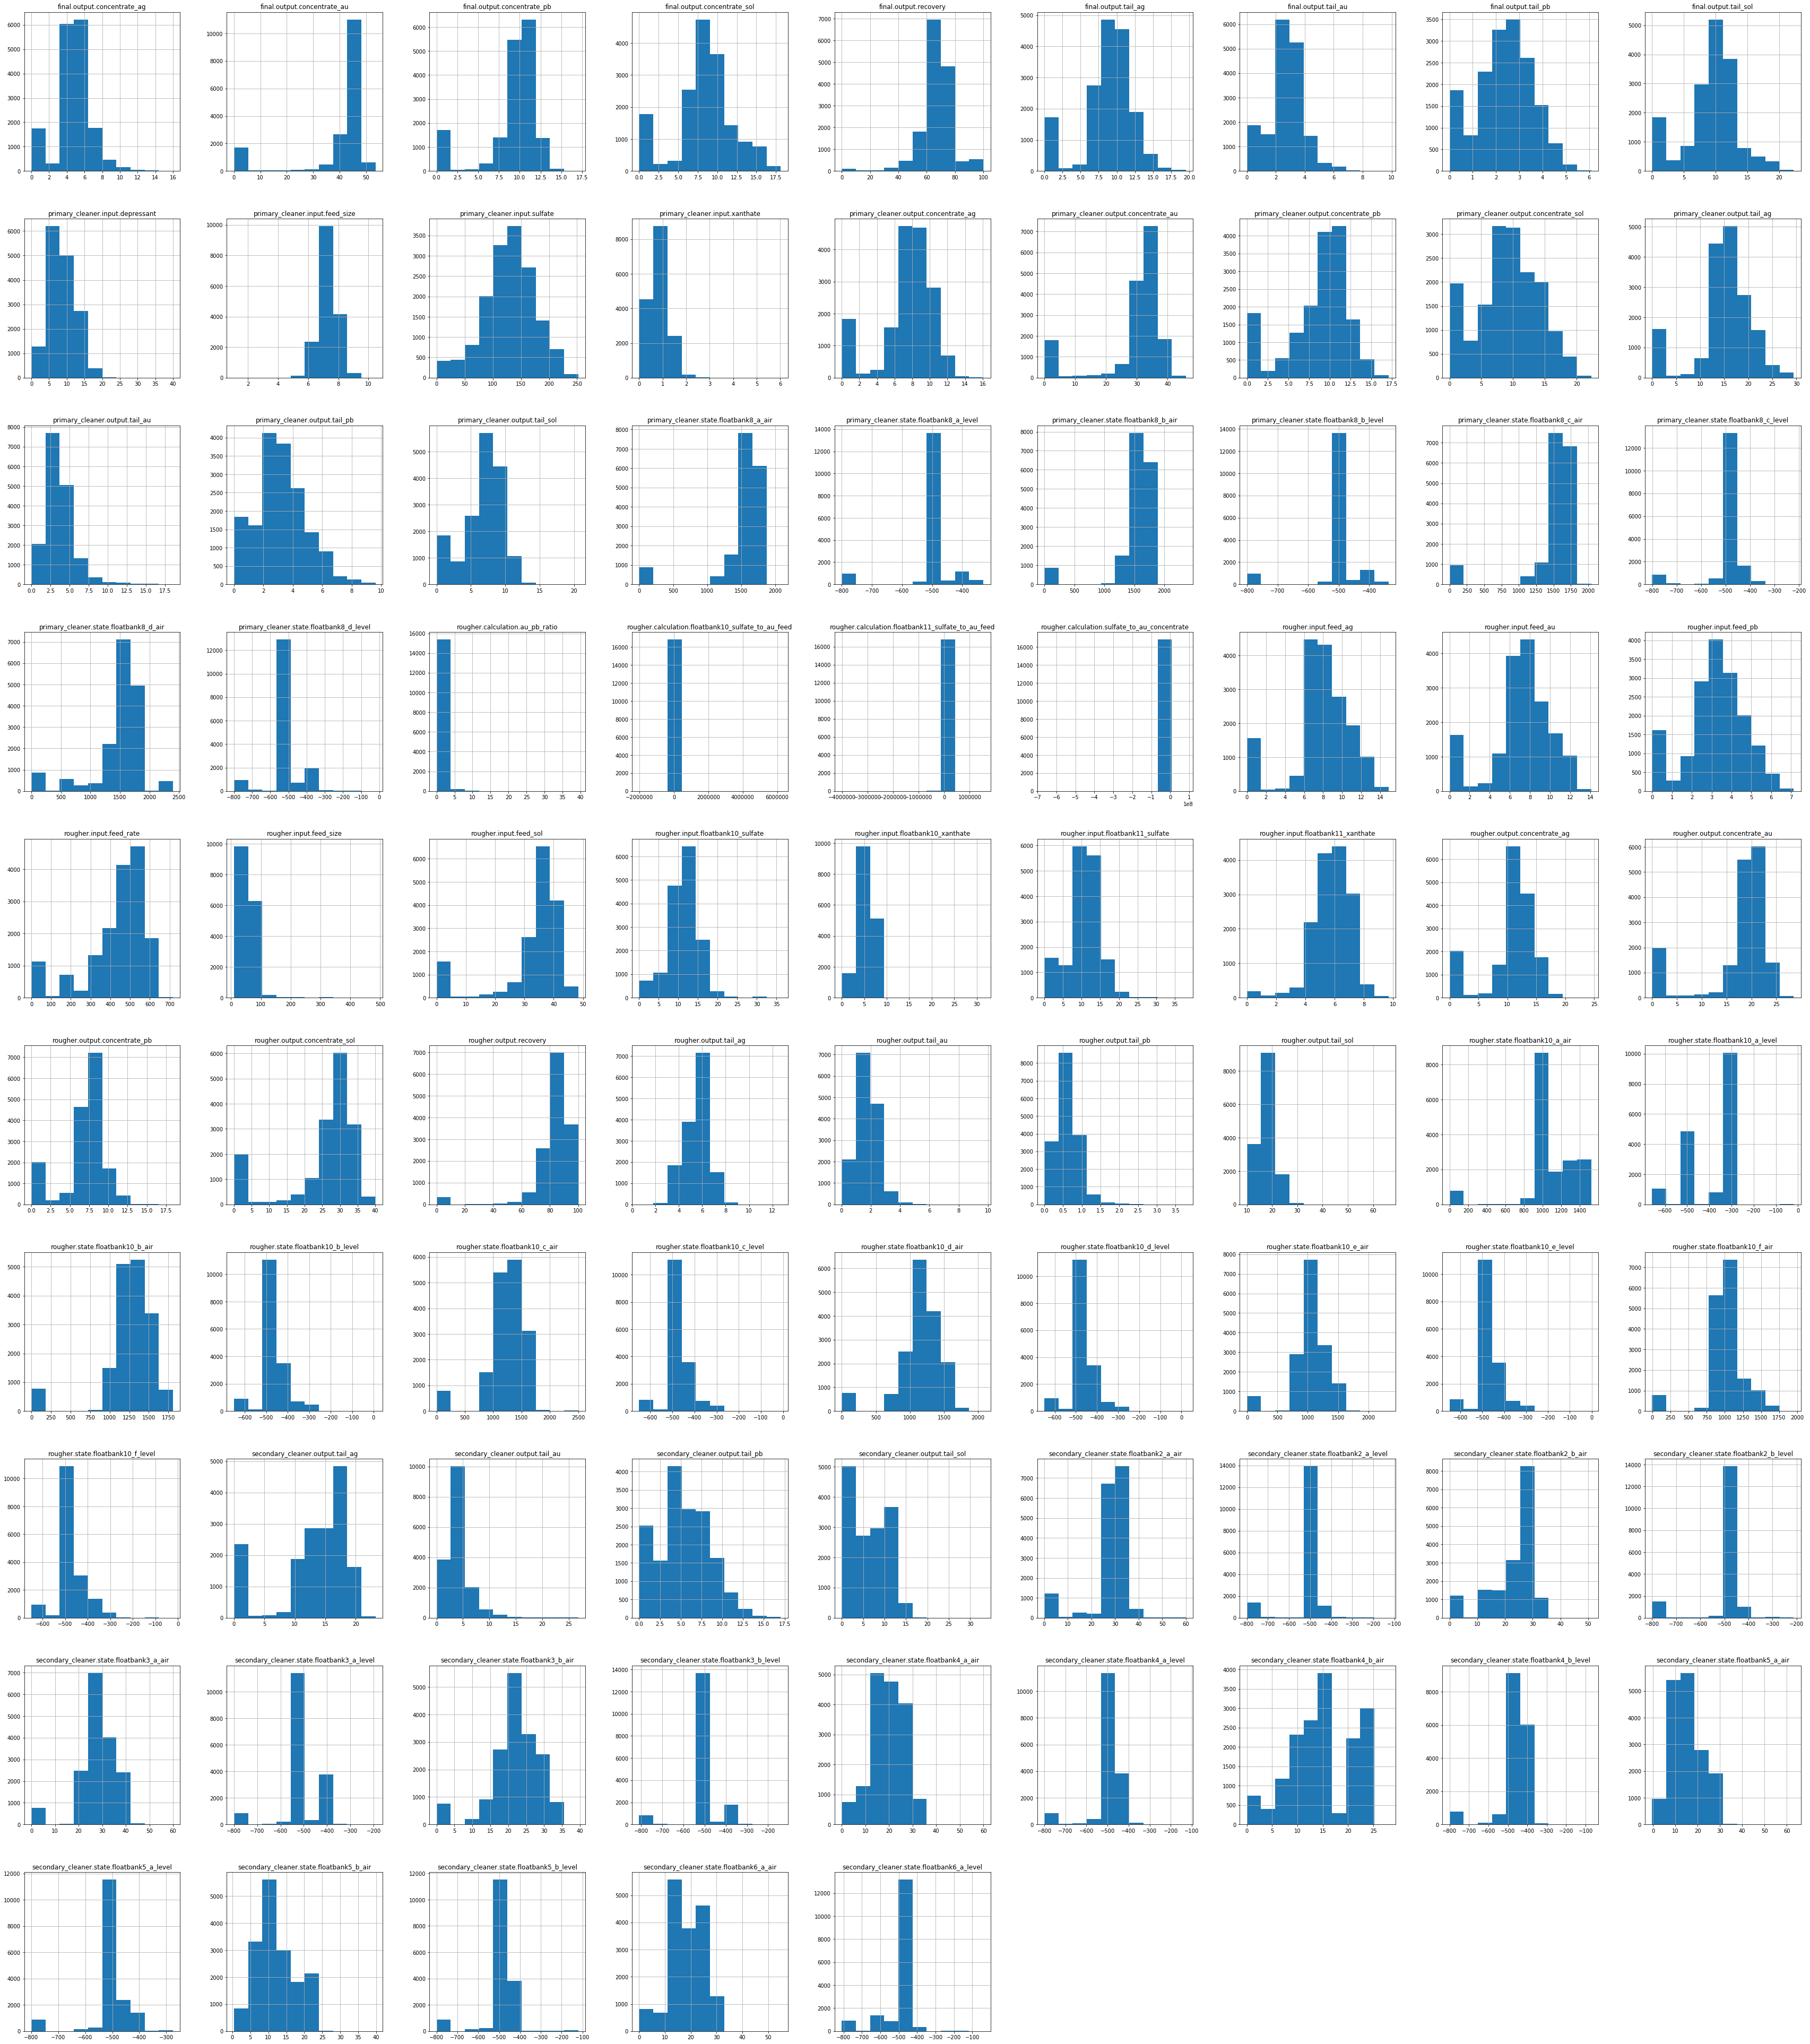

In [5]:
train.hist(figsize = (60, 70))

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [7]:
test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18f53b2b90>,
      dtype=object)

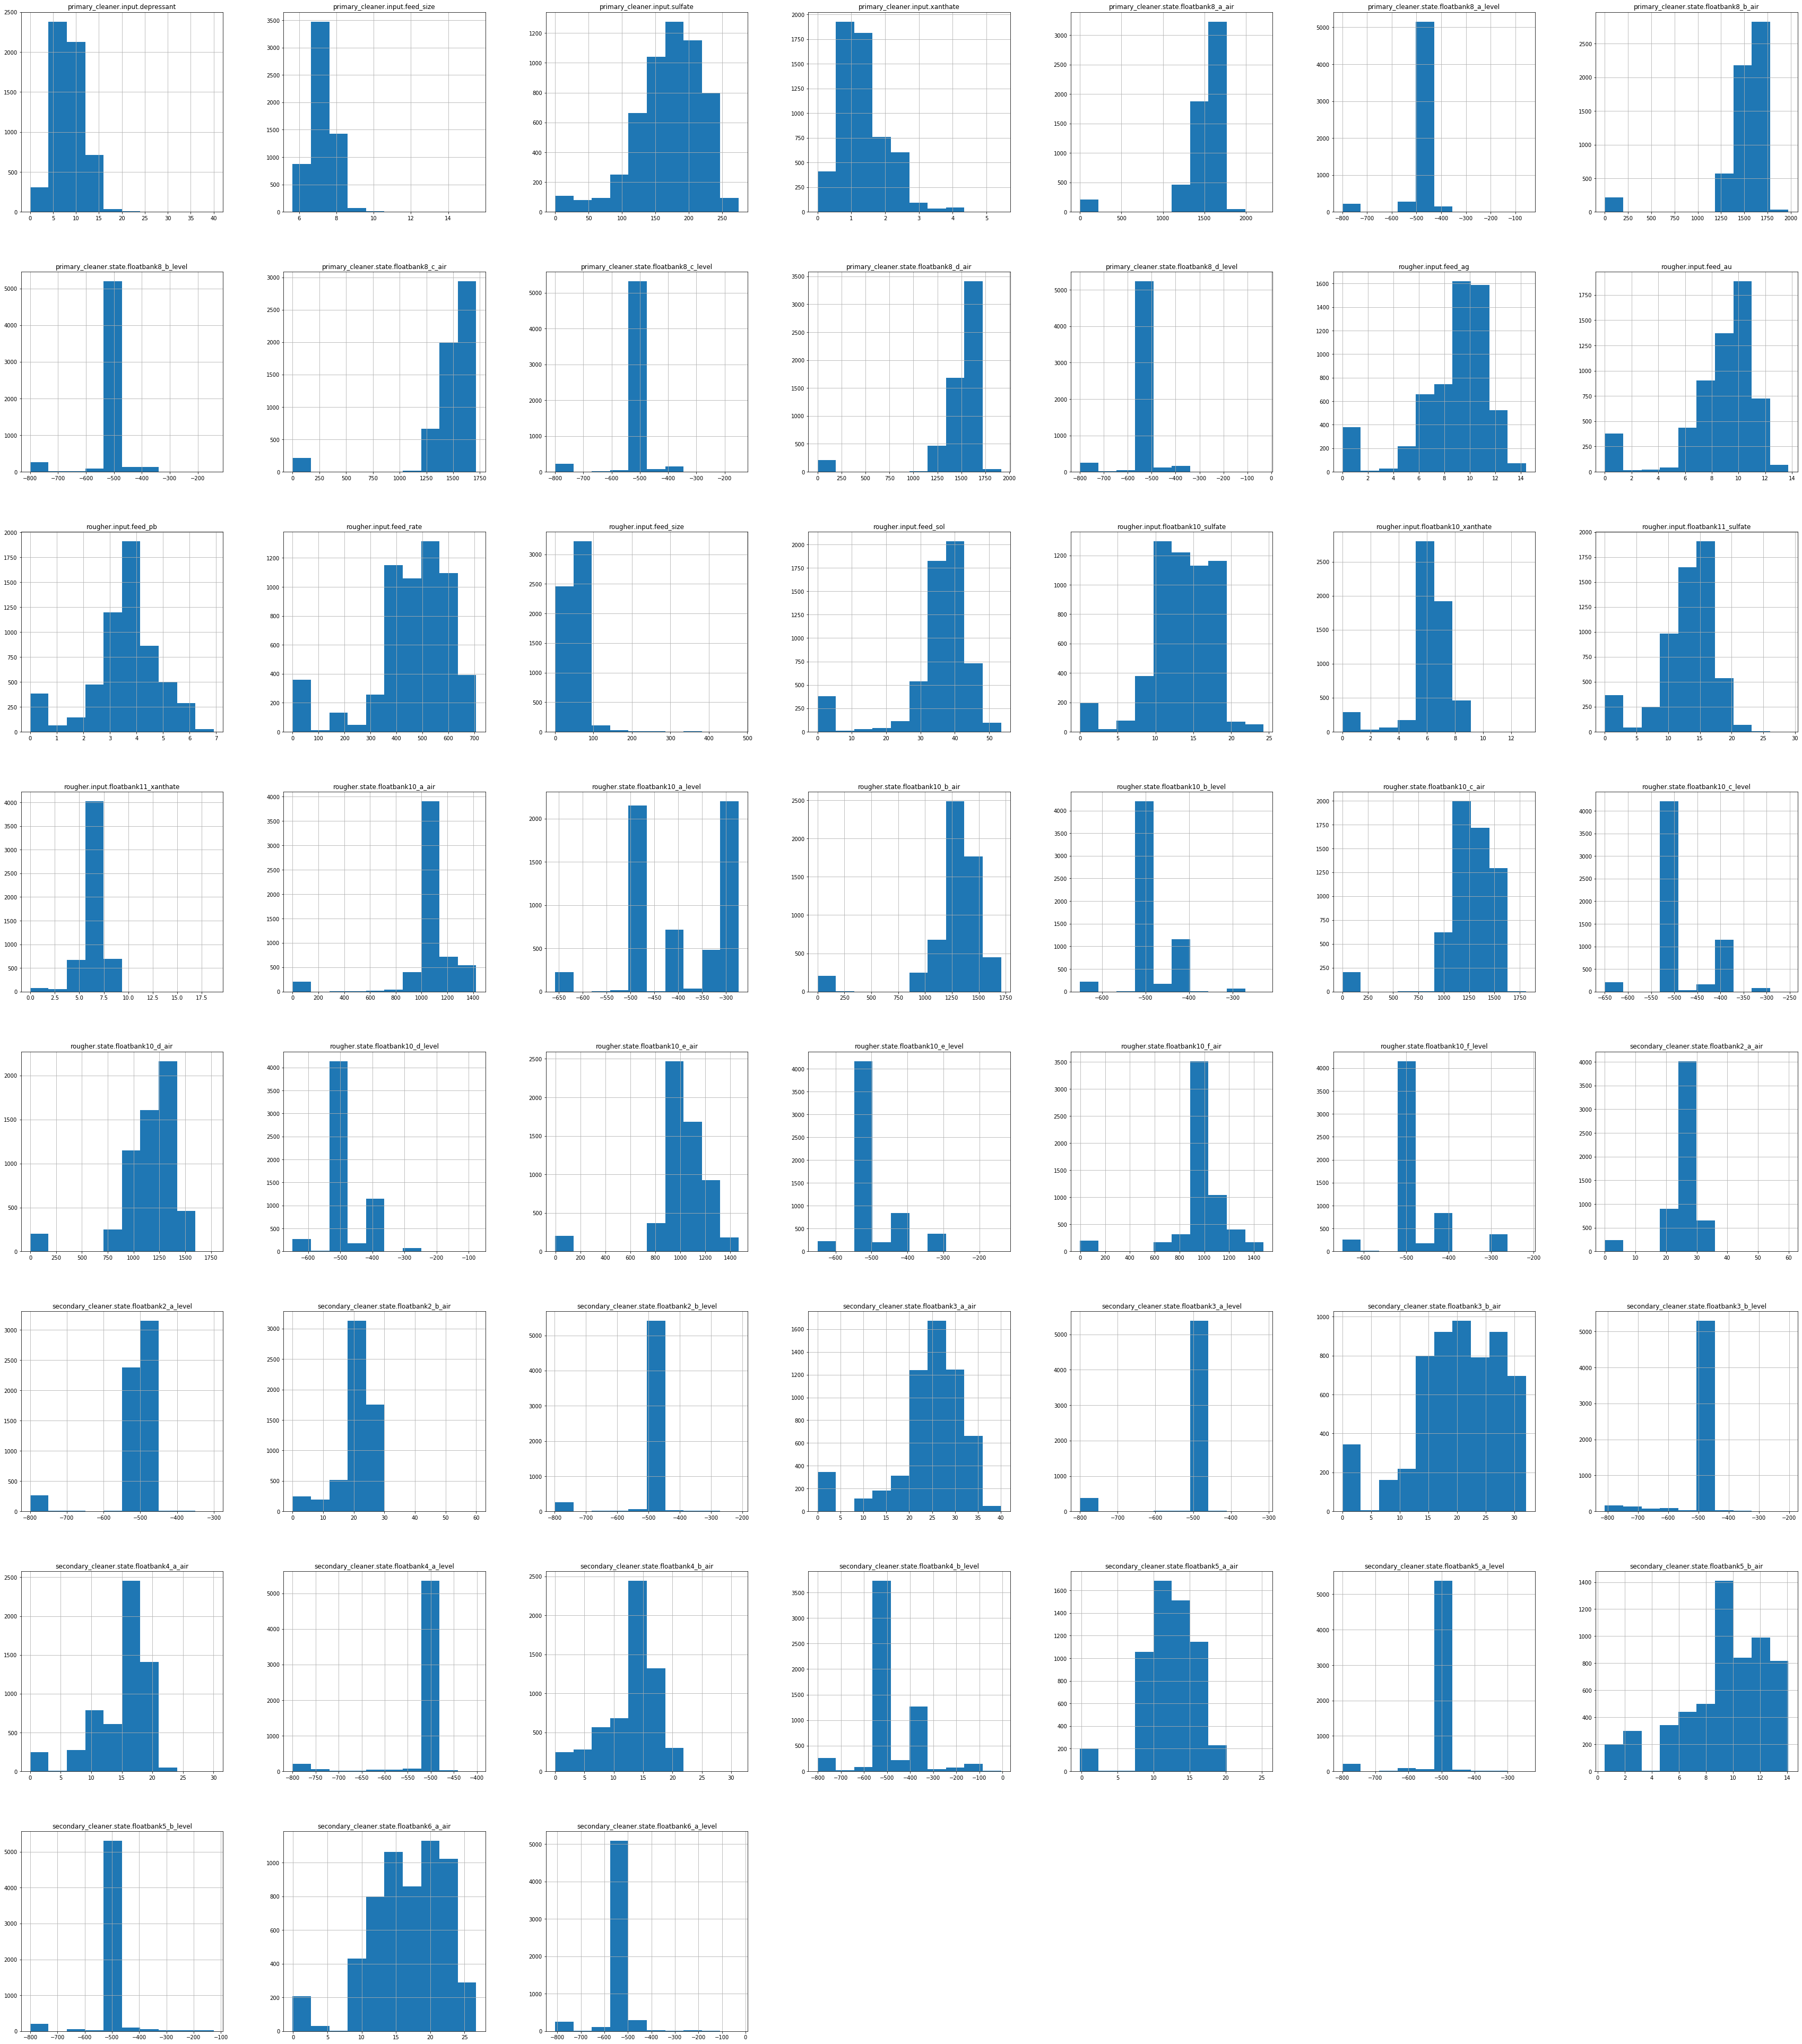

In [8]:
test.hist(figsize = (60, 70))

In [9]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [10]:
full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19021a8150>,
      dtype=object)

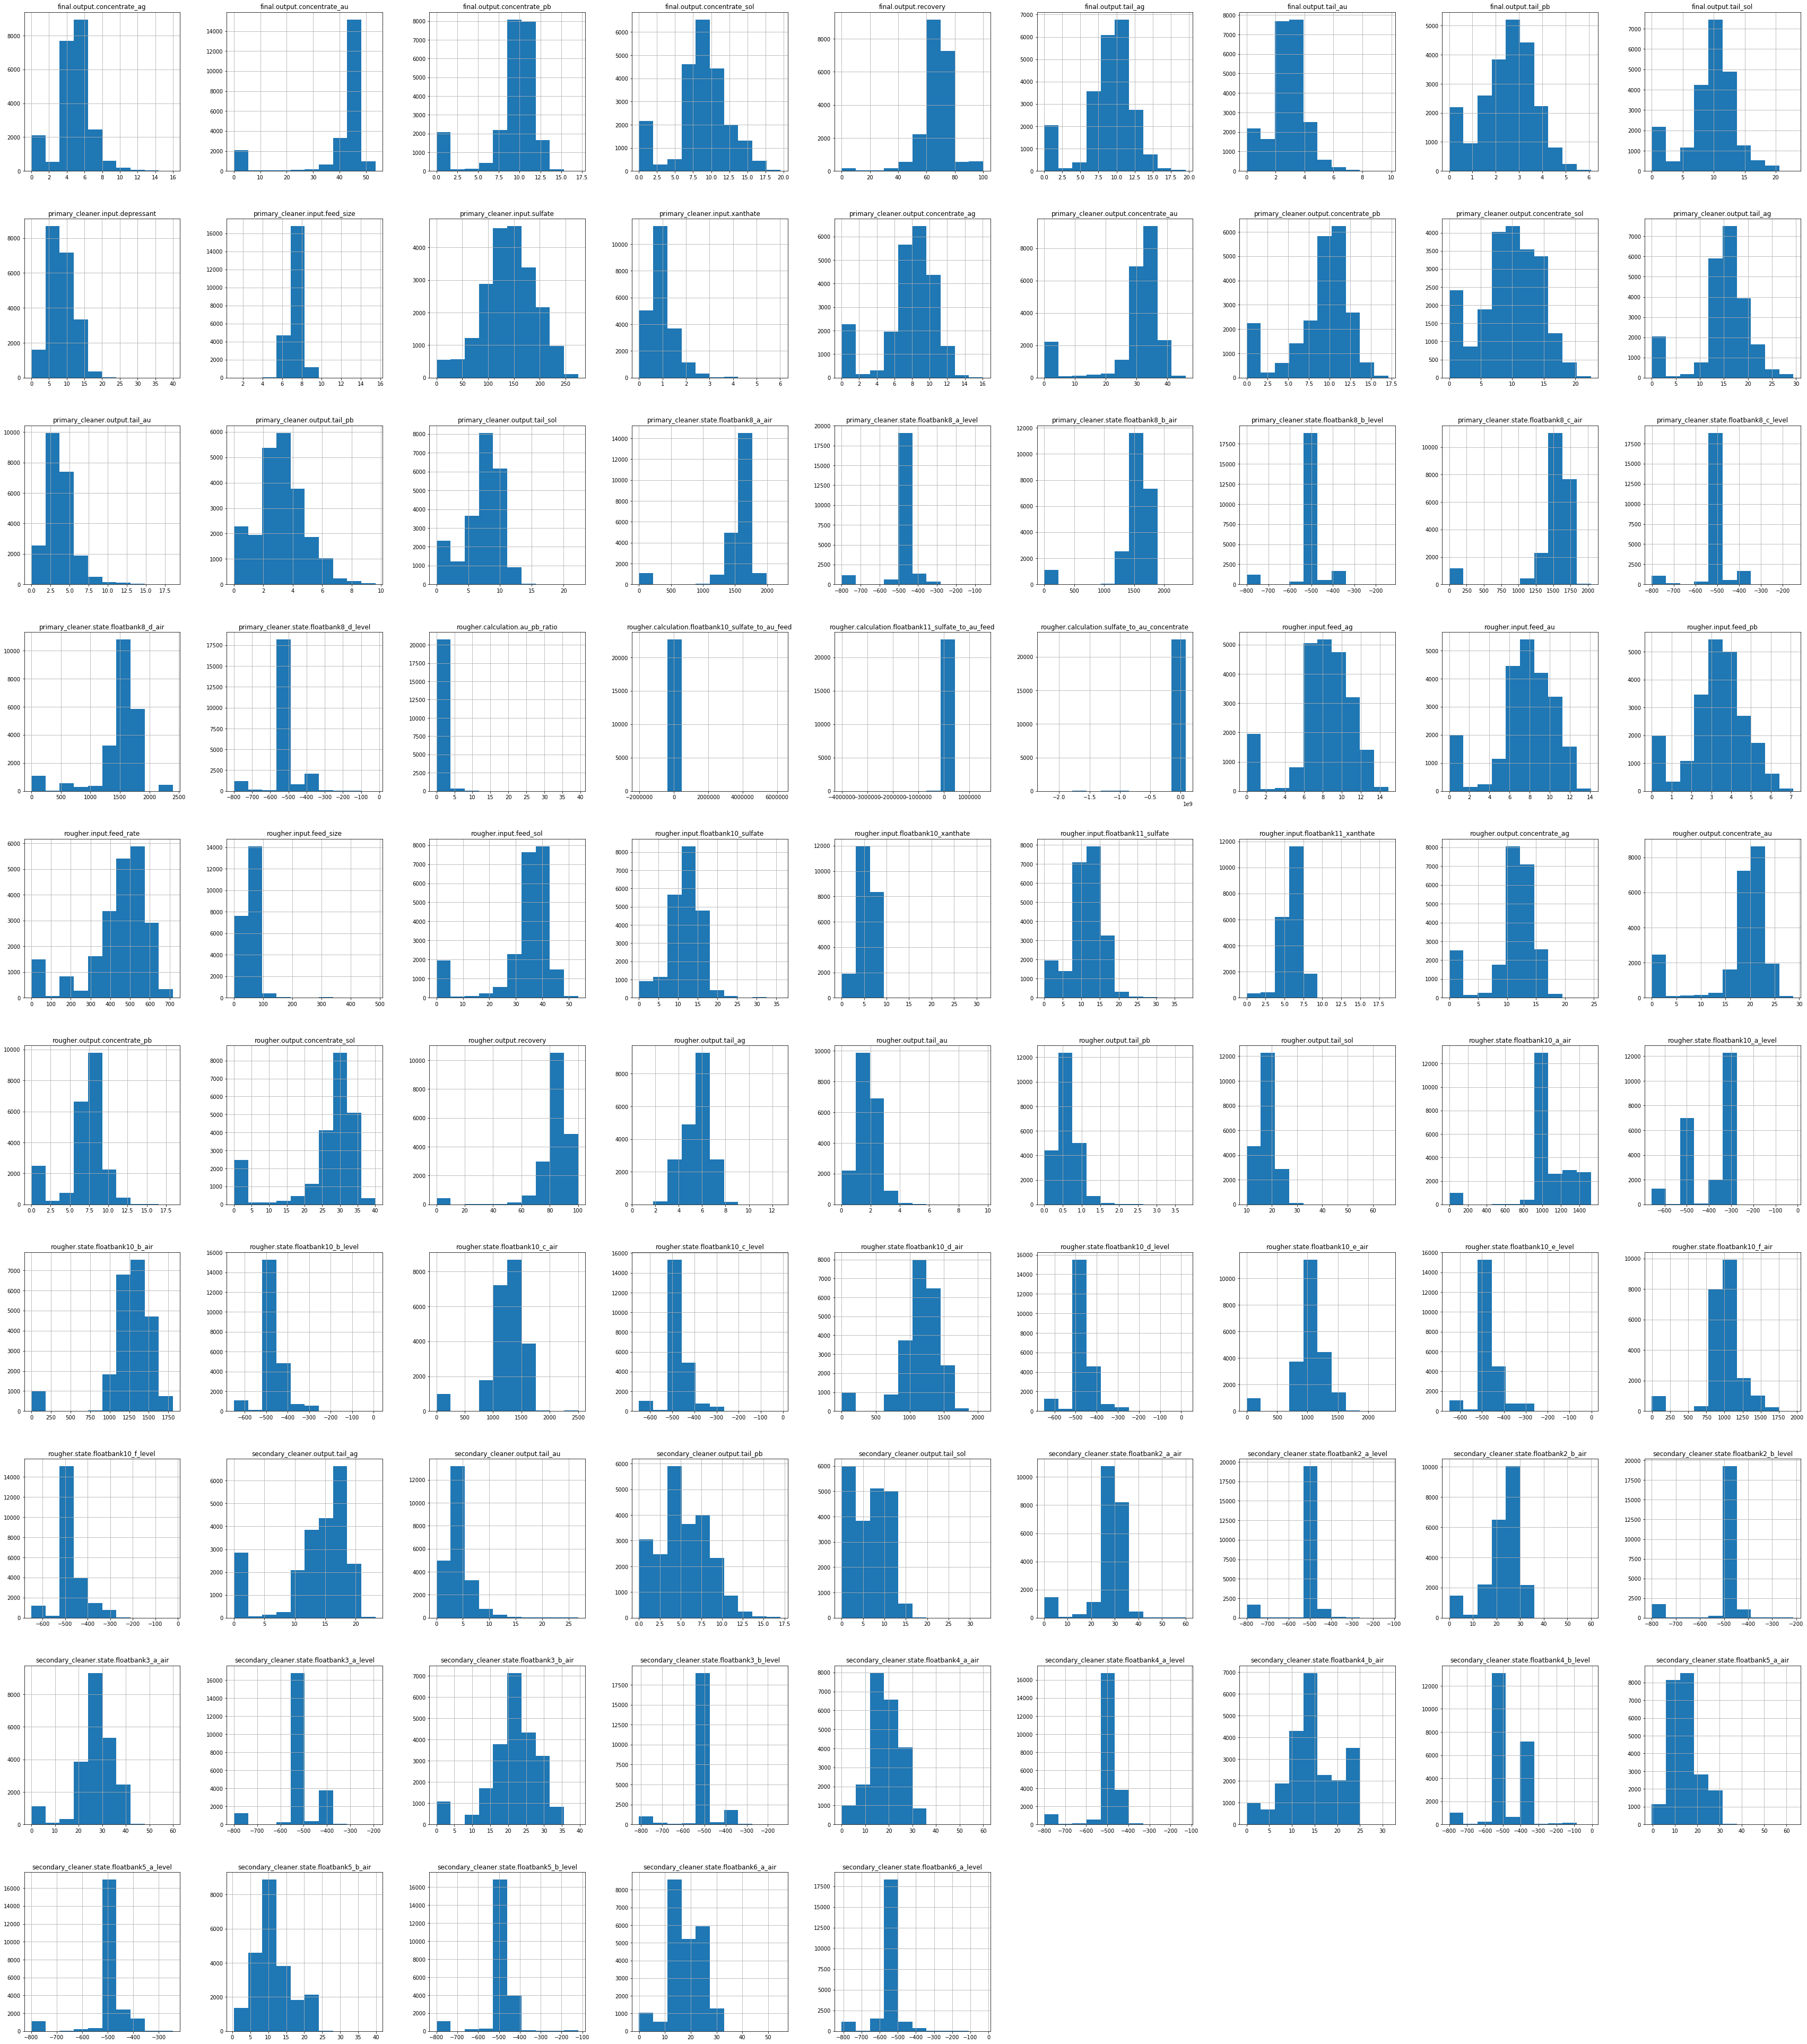

In [11]:
full.hist(figsize = (60, 70))

#### При знакомстве с данными определено, что в таблицах большое количество пропущенных данных. Так же столбец с датами можно перевести в формат datetime, но необязательно (для обучения модели данный признак не несет полезной информации, скорее наоборот будет способствовать переобучению модели).  Данные требуют масштабирования для лучшего обучения модели. Медианные значения и средние достаточно близки, так же максимальные значения выглядят вполне возможными. На гистограммаъ видны отдельно стоящие пенькис очень большими/малыми значениями, возможо это выбросы.

## 1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между расчётами и значением признака.

In [12]:
train1 = train.dropna()

In [13]:
RECOVERY = (train1['rougher.output.concentrate_au'] * (train1['rougher.input.feed_au'] - train1['rougher.output.tail_au'] )) / (
            train1['rougher.input.feed_au'] * (train1['rougher.output.concentrate_au'] - train1['rougher.output.tail_au'])) * 100
target = train1['rougher.output.recovery']

In [14]:
print('Средняя расчитаная вручную эффективность обогащения:', RECOVERY.mean())
print('Средняя эффективность обогащения из таблицы:', target.mean())

Средняя расчитаная вручную эффективность обогащения: 82.7418884610155
Средняя эффективность обогащения из таблицы: 82.7418884610155


In [15]:
MAE = mean_absolute_error(target, RECOVERY)
print("MAE:", MAE)

MAE: 9.555596961987514e-15


#### среднее абсолютное отклонение между нашими расчетами и таблицными значениями настолько мало, что их можно принять идентичными. Эффективность обогащения в даных посчитана правильно, данным можно доверять.

## 1.3. Проанализируем признаки, недоступные в тестовой выборке.

In [16]:
calculation = ['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio']

In [17]:
train[calculation].head(5)

,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio
0,41885.707031,3481.779053,3520.337158,2.838687
1,42050.861809,3498.370979,3489.981857,2.858998
2,42018.101184,3495.348910,3502.359819,2.945989
3,42029.447991,3498.578313,3499.162912,3.002340
4,42125.354245,3494.800771,3506.679315,3.169615


####    В тестовой выборке отсутствуют все выходные данные по этамам обработки, из чего следует что целевыми признаками у нас будут именно эти столбцы и модель должна будет предсказывать выходной продукт на каждом этапе обработки руды. 
####    Так же в тестовой выборке отсутствуют графы .calculated (расчетные характеристики). Их мы так же примем за целевой признак, т.к. их расчет для дальнейшей реакции производится непосредственно перед 2 этапомфильтрации.
####    Тип float подходит для ранимых в столбцах данных, изменять его мы не будем.

## 1.4. Проведем предобработку данных.

#### для предобработки данных удалим все пропуски, чтобы не портить обучаемость модели, т.к. восстановить их достоверно не представляется возможным, а замена средними значениями по таблице исказит обобщаемость. Потеря ~ 5800 строк достаточно большая, но у нас остается еще более 11тыс. строк для обучения, чего я считаю достаточным. Столбец с датами так же удалим, т.к. модель может научиться предсказывать результат основываясь на датах получения образцов, что не является достоверным источником информации, хотя, в теории, может и быть полезным.

In [18]:
train.dropna(inplace=True)
test.dropna(inplace=True)
full.dropna(inplace=True)

In [19]:
train = train.drop(['date'], axis = 1)
test = test.drop(['date'], axis = 1)
full = full.drop(['date'], axis = 1)

In [20]:
target_col = ['rougher.output.recovery', 'final.output.recovery']
target_col1 = ['rougher.output.recovery']
target_col2 = ['final.output.recovery']
features_col = []

for i in train.columns:
    if i in test.columns:
        features_col.append(i)

In [21]:
target_col

['rougher.output.recovery', 'final.output.recovery']

In [22]:
features_col

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

# 2. Анализ данных

## 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [23]:
Au_p = full['primary_cleaner.output.concentrate_au'].mean()
Au_r = full['rougher.output.concentrate_au'].mean()
Au_f = full['final.output.concentrate_au'].mean()

Ag_p = full['primary_cleaner.output.concentrate_ag'].mean()
Ag_r = full['rougher.output.concentrate_ag'].mean()
Ag_f = full['final.output.concentrate_ag'].mean()

Pb_p = full['primary_cleaner.output.concentrate_pb'].mean()
Pb_r = full['rougher.output.concentrate_pb'].mean()
Pb_f = full['final.output.concentrate_pb'].mean()

In [24]:
print("Средняя концентрация веществ на этапе флотации:", '\n',"Au -",  Au_r, '\n', "Ag -", Ag_r, '\n', "Pb -", Pb_r)

Средняя концентрация веществ на этапе флотации: 
 Au - 20.05215197989563 
 Ag - 12.084944858379451 
 Pb - 7.553095191381346


In [25]:
print("Средняя концентрация веществ на 1 этапе очистки:", '\n',"Au -",  Au_p, '\n', "Ag -", Ag_p, '\n', "Pb -", Pb_p)

Средняя концентрация веществ на 1 этапе очистки: 
 Au - 32.06555911061983 
 Ag - 8.674852987693988 
 Pb - 9.884018203488715


In [26]:
print("Средняя концентрация веществ на 2 этапе очистки:", '\n',"Au -",  Au_f, '\n', "Ag -", Ag_f, '\n', "Pb -", Pb_f)

Средняя концентрация веществ на 2 этапе очистки: 
 Au - 44.30743739837964 
 Ag - 5.190975683404247 
 Pb - 9.997593468101922


#### Как видим по средним значениям содержания металлов в образцах, на каждом этапе очистки содержание золота и свинца в руде растет, в то время как содержание серебра падает. 

## 2.2. Сравним распределение размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

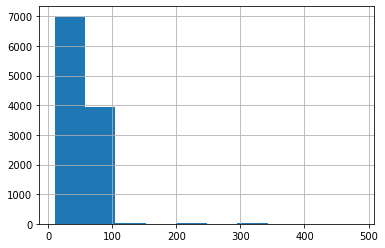

In [27]:
train['rougher.input.feed_size'].hist()

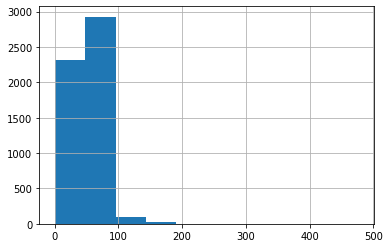

In [28]:
test['rougher.input.feed_size'].hist()

#### модели не сильно отличаются между собой по распределению размеров гранул, модель будет давать достаточно точные предсказания.

## 2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [29]:
def wuf (what, numb):
    if numb == 1:
        return what.plot(kind = 'hist', title = "График распределения ДО")
    else:
        return what.plot(kind = 'hist', title = "График распределения ПОСЛЕ")

In [30]:
def concentrate (df):
    concentrate_r = df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_au'] + df['rougher.output.concentrate_pb']
    concentrate_p = df['primary_cleaner.output.concentrate_ag'] + df['primary_cleaner.output.concentrate_au'] + df['primary_cleaner.output.concentrate_pb']
    concentrate_f = df['final.output.concentrate_ag'] + df['final.output.concentrate_au'] + df['final.output.concentrate_pb']
    return concentrate_r, concentrate_p, concentrate_f

In [31]:
def anomaly (df):
    concentrate_r, concentrate_p, concentrate_f = concentrate (df)
    number = int(input("Порог среза: " ))
    df = df.query('@concentrate_r > @number')
    df = df.query('@concentrate_p > @number')
    df = df.query('@concentrate_f > @number')
    concentrate_r, concentrate_p, concentrate_f = concentrate (df)
    wuf (concentrate_r, 2)
    wuf (concentrate_p, 2)
    wuf (concentrate_f, 2)
    return df

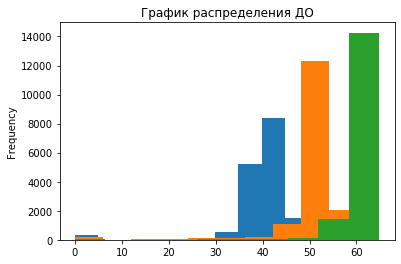

In [32]:
concentrate_r, concentrate_p, concentrate_f = concentrate (full)
wuf (concentrate_r, 1)
wuf (concentrate_p, 1)
wuf (concentrate_f, 1)

Порог среза: 10


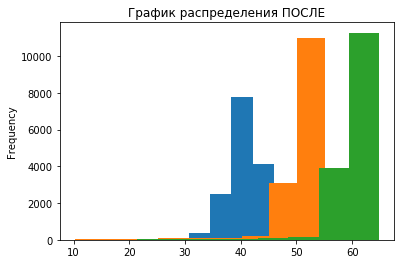

In [33]:
full = anomaly (full)

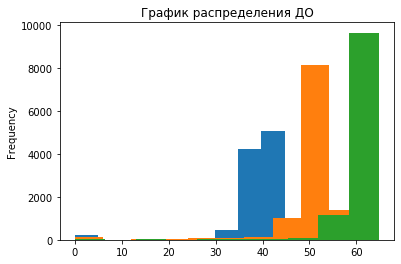

In [34]:
concentrate_r, concentrate_p, concentrate_f = concentrate (train)
wuf (concentrate_r, 1)
wuf (concentrate_p, 1)
wuf (concentrate_f, 1)

Порог среза: 10


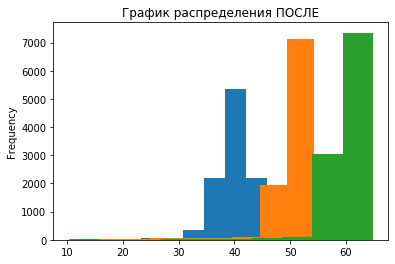

In [35]:
train = anomaly (train)

#### В суммарной концентрации веществ имеются одинокие пеньки около нулевых значений, это аномалии, которые необходимо убрать из датасетов.

# 3. Модель

## 3.1. Напишите функцию для вычисления итоговой sMAPE.

In [36]:
def smape_1 (y_test, y_pred):
    for i in range (0, len(y_pred)):
        smape_r = ((abs(y_test['rougher.output.recovery'] - y_pred[i][0])) / ((abs(y_test['rougher.output.recovery']) + abs(y_pred[i][0])) / 2))
        smape_f = ((abs(y_test['final.output.recovery'] - y_pred[i][1])) / ((abs(y_test['final.output.recovery']) + abs(y_pred[i][1])) / 2))
        istina = (smape_r*0.25 + smape_f*0.75)
    return istina.median()

In [37]:
def smape(y_test, y_pred):
    err = (y_test - y_pred).abs()
    scale = (y_test.abs() + y_pred.abs()) / 2
    
    return (err / scale).mean()


def smape_fin(y_test, y_pred):
    etap_rougher = smape(y_test['rougher.output.recovery'], y_pred['rougher.output.recovery'])
    etap_final = smape(y_test['final.output.recovery'], y_pred['final.output.recovery'])
    return 0.25 * etap_rougher + 0.75 * etap_final

pred_median = train.copy()
pred_median['rougher.output.recovery'] = train['rougher.output.recovery'].median()
pred_median['final.output.recovery'] = train['final.output.recovery'].median()
print(smape_fin(train, pred_median))

0.08428407250700637


In [38]:
scorrer = make_scorer (smape_1)

## 3.2. Обучим разные модели и выберем лучшую

#### Для начала посчитаем скор моделей с базовыми параметрами, чтобы было от чего отталкиваться в наших дальнейших исследованиях.

In [39]:
np.median(cross_val_score (RandomForestRegressor (random_state = 42), train[features_col], train[target_col], cv=5, n_jobs = -1, scoring = scorrer))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

0.12008392335032914

In [40]:
np.median(cross_val_score (LinearRegression (), train[features_col], train[target_col], cv=5, n_jobs = -1, scoring = scorrer))

0.07120345486053528

In [41]:
np.median(cross_val_score (DecisionTreeRegressor (random_state = 42), train[features_col], train[target_col], cv=5, n_jobs = -1, scoring = scorrer))

0.10185753700493246

In [42]:
np.median(cross_val_score (DummyRegressor (), train[features_col], train[target_col], cv=5, n_jobs = -1, scoring = scorrer))

0.06236697302540187

#### Теперь когда у нас есть некий baseline применим методы масштабирования и оптимизируем гиперпараметры наших моделей

#### МАСШТАБИРОВАНИЕ

In [43]:
ss = StandardScaler()
train_scaled = ss.fit_transform(train[features_col])
test_scaled = ss.transform(test[features_col])

#### Оптимизация гиперпараметров

In [ ]:
for depth in range (1, 12, 5):
    for estimators in range (1,61,10):        
        model = RandomForestRegressor(max_depth=depth, n_estimators=estimators, random_state=42)
        score = np.median(cross_val_score (model, train_scaled, train[target_col], cv=5, n_jobs = -1, scoring = scorrer))
        print("RF, depth =", depth, "RF, estimators", estimators, "score =", score)    

In [44]:
BEST_PARAM = {'n_estimators': 11, 'max_depth': 11}
model_forest = RandomForestRegressor (random_state = 42, n_estimators = 11, max_depth = 11)

In [45]:
np.median(cross_val_score (model_forest, train_scaled, train[target_col], cv=5, n_jobs = -1, scoring = scorrer))

0.12465649890525742

In [ ]:
for depth in range (1, 14, 3):
    model = DecisionTreeRegressor (max_depth=depth, random_state=42)
    score = np.median(cross_val_score (model, train_scaled, train[target_col], cv=5, n_jobs = -1, scoring = scorrer))
    print("DT, depth =", depth, "score =", score) 

In [46]:
BEST_PARAM = {'max_depth': 10}
model_tree = DecisionTreeRegressor (random_state = 42, max_depth = 10)

In [47]:
np.median(cross_val_score (model_tree, train_scaled, train[target_col], cv=5, n_jobs = -1, scoring = scorrer))

0.13065647681048245

In [48]:
model_lin = LinearRegression ()

In [49]:
np.median(cross_val_score (model_lin, train_scaled, train[target_col], cv=5, n_jobs = -1, scoring = scorrer))

0.07120345486053888

#### после скалирования все модели показали улучшение в предсказаниях. 

#### Но так как по итогу наилучший результат (неожиданно) дала модель дерева решений, то ее и используем как основную.

In [50]:
test_scaled = pd.DataFrame(test_scaled, columns = test.columns)
test_target = full[target_col].loc[test_scaled.index]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [51]:
test_scaled=test_scaled.reset_index(drop=True)
test_target=test_target.reset_index(drop=True).fillna(method="ffill")

In [53]:
model_tree.fit(train_scaled, train[target_col])
pred = pd.DataFrame(model_tree.predict(test_scaled))
pred.columns=[train[target_col].columns[0],train[target_col].columns[1]]
print("train:", smape_fin(train[target_col], pred))

pred = pd.DataFrame(model_tree.predict(test_scaled))
pred.columns=[test_target.columns[0],test_target.columns[1]]
scors = smape_fin(test_target, pred)
print("test:", scors)

train: 0.11458194324523199
test: 0.11789854583598496


### Вывод:  
<b>В данной работе нам предстояло смоделировать технологический процессс по восстановлению золота из руды припомощи математических моделей с применением новой метрики sMAPE. После ознакомления с даннымии их предобработки были построены базовые модели и проверена их адекватность на предсказании медеанным значением и ДаммиРегрессором. После применения методов скалирования исходных данных для улучшения обобщаемости моделей было определено, что модель дерева решений лучше остальных прогнозирует долю восстановления золота. Именно с ее помощью было сделано предсказание на представленной тестовой выборке и определено значение sMAPE равное 11,79%. </b>

